# Welcome to Colab!

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Saving CICIDS2017.csv to CICIDS2017 (1).csv
Dataset Loaded Successfully!
   label_num  other_column
0          0             0
1          0             1
2          0             2
3          0             3
4          0             4

🎯 Model Accuracy: 100.0 %

📌 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    550931
           1       1.00      1.00      1.00    606024

    accuracy                           1.00   1156955
   macro avg       1.00      1.00      1.00   1156955
weighted avg       1.00      1.00      1.00   1156955



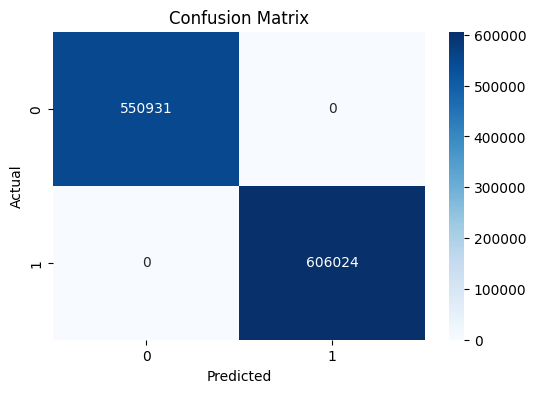

In [2]:

!pip install scikit-learn pandas numpy matplotlib seaborn


import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("Dataset Loaded Successfully!")
print(df.head())


df.dropna(inplace=True)


X = df.drop("label_num", axis=1)
y = df["label_num"]  


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


model = RandomForestClassifier(n_estimators=120, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("\n🎯 Model Accuracy:", round(accuracy * 100, 2), "%")


print("\n📌 Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")

plt.show()